In [50]:
#Importing Required Library

import pandas as pd                         #data analysis and manipulation
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation

%matplotlib inline     
sns.set(color_codes=True)

In [51]:
#Loading Data Into Data Frame

df = pd.read_csv("heartdisease.csv") 
df.head(5)                                 # Display the top 5 rows

,age,gender,chest pain,rest SBP,cholesterol,fasting blood sugar > 120,rest ECG,max HR,exerc ind ang,ST by exercise,slope peak exc ST,major vessels colored,thal,diameter narrowing
0,63,0,4,145,233,1,2,150,0,2.3,2,0,1,0
1,67,0,1,160,286,0,2,108,1,1.5,0,3,0,1
2,67,0,1,120,229,0,2,129,1,2.6,0,2,2,1
3,37,0,2,130,250,0,0,187,0,3.5,2,0,0,0
4,41,1,3,130,204,0,2,172,0,1.4,1,0,0,0


In [53]:
df = df.drop(["diameter narrowing","major vessels colored","slope peak exc ST","exerc ind ang", "ST by exercise", "thal"], axis = 1)
df = df.drop_duplicates()
df.head()

,age,gender,chest pain,rest SBP,cholesterol,fasting blood sugar > 120,rest ECG,max HR
0,63,0,4,145,233,1,2,150
1,67,0,1,160,286,0,2,108
2,67,0,1,120,229,0,2,129
3,37,0,2,130,250,0,0,187
4,41,1,3,130,204,0,2,172


In [54]:
print(df.isnull().sum())

age                          0
gender                       0
chest pain                   0
rest SBP                     0
cholesterol                  0
fasting blood sugar > 120    0
rest ECG                     0
max HR                       0
dtype: int64


In [55]:
from sklearn.preprocessing import normalize
data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled.head()

,age,gender,chest pain,rest SBP,cholesterol,fasting blood sugar > 120,rest ECG,max HR
0,0.197450,0.000000,0.012537,0.454449,0.730253,0.003134,0.006268,0.470120
1,0.190610,0.000000,0.002845,0.455189,0.813650,0.000000,0.005690,0.307252
2,0.225888,0.000000,0.003371,0.404575,0.772064,0.000000,0.006743,0.434918
3,0.108757,0.000000,0.005879,0.382118,0.734843,0.000000,0.000000,0.549663
4,0.136823,0.003337,0.010011,0.433828,0.680776,0.000000,0.006674,0.573987


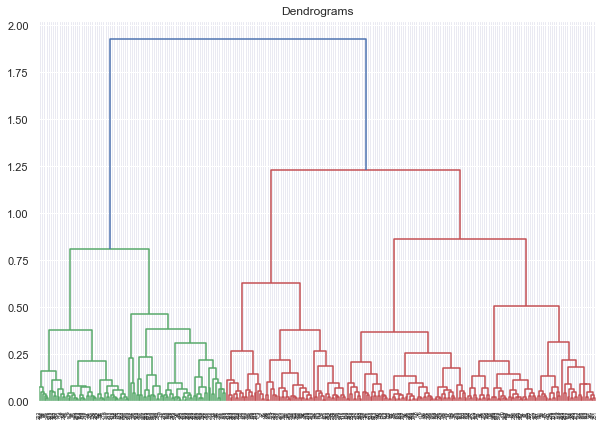

In [56]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

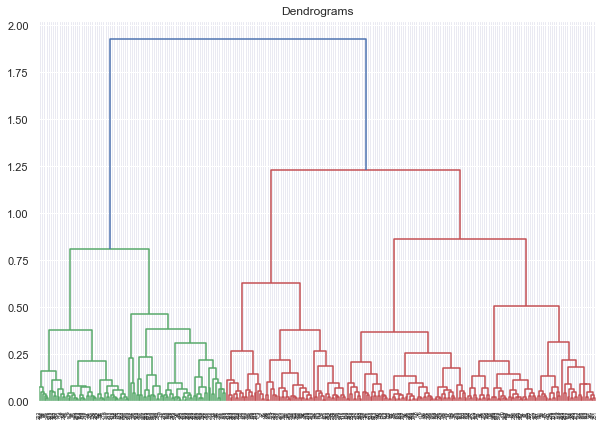

In [57]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [58]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([0, 2, 0, 1, 1, 1, 0, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 2, 2, 0, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 1, 1, 1, 2, 1, 0, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 2, 1, 2, 1, 0, 2, 0, 2, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 0, 1, 2, 1, 0, 0, 0,
       0, 0, 1, 2, 2, 0, 1, 1, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 2, 1, 2, 0, 0, 2, 0, 2,
       0, 0, 2, 1, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0,
       1, 2, 0, 2, 1, 2, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1,
       0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 2, 1, 0, 1, 2, 2, 0, 0, 2, 0, 2,
       0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1,
       1, 2, 1, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 1, 1, 2,
       1, 0, 1, 1, 1, 2, 1, 1, 0, 1, 0, 0, 2, 1, 1,

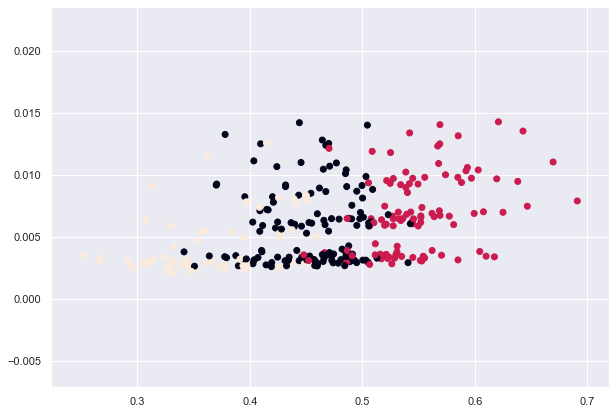

In [59]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['max HR'], data_scaled['chest pain'], c=cluster.labels_) 

In [60]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,

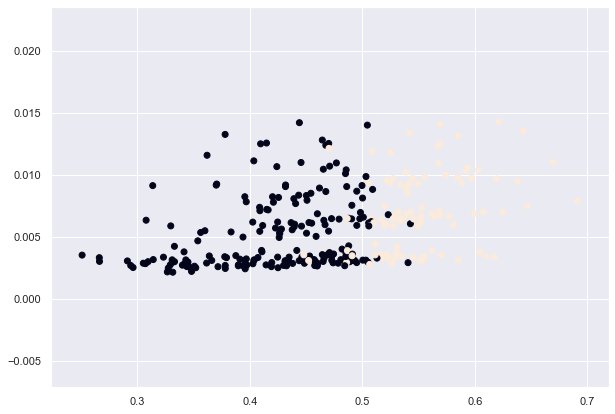

In [61]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['max HR'], data_scaled['chest pain'], c=cluster.labels_) 